In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

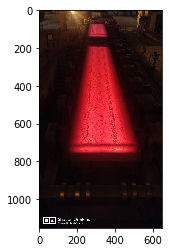

In [2]:
img = cv2.imread("Slab Dimension/WhatsApp Image 2019-11-29 at 1.20.50 PM.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
r,g,b = cv2.split(img)

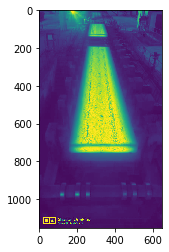

In [4]:
plt.imshow(r)

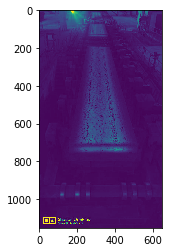

In [5]:
plt.imshow(g)

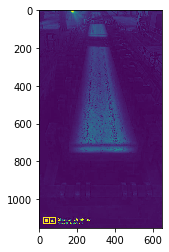

In [6]:
plt.imshow(b)

In [7]:
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

In [8]:
h,s,v = cv2.split(hsv)

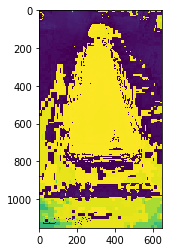

In [9]:
plt.imshow(h)

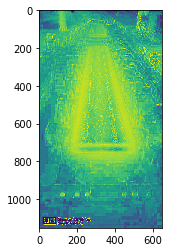

In [10]:
plt.imshow(s)

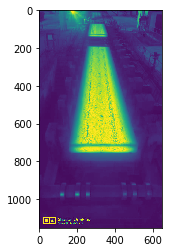

In [11]:
plt.imshow(v)

In [12]:
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

In [13]:
l,a,b = cv2.split(lab)

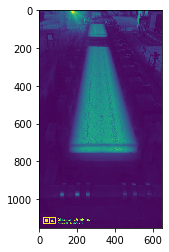

In [14]:
plt.imshow(l)

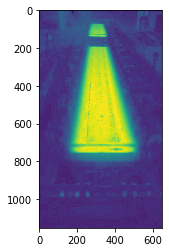

In [15]:
plt.imshow(a)

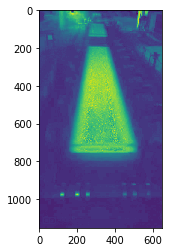

In [16]:
plt.imshow(b)

In [17]:
luv = cv2.cvtColor(img,cv2.COLOR_RGB2LUV)

In [18]:
l,u,v = cv2.split(luv)

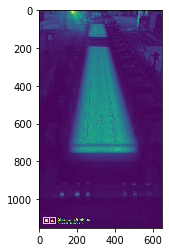

In [19]:
plt.imshow(l)

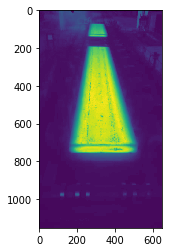

In [20]:
plt.imshow(u)

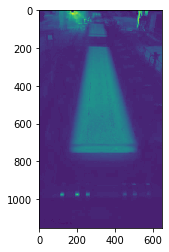

In [21]:
plt.imshow(v)

## merge them

In [22]:
test = np.dstack((r,s,a))

In [23]:
test.shape

(1152, 648, 3)

In [24]:
cv2.imshow("jhkbk",test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
'''testGray = np.zeros((test.shape[0],test.shape[1]))
print(testGray.shape)
for i in range(0,test.shape[1]):
    for j in range(0,test.shape[0]):
        testGray[j][i] = testGray[;,;0]
        '''
#plt.imshow(test[:,:,3],"gray")

'testGray = np.zeros((test.shape[0],test.shape[1]))\nprint(testGray.shape)\nfor i in range(0,test.shape[1]):\n    for j in range(0,test.shape[0]):\n        testGray[j][i] = testGray[;,;0]\n        '

In [27]:
cv2.imshow("aa",test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
gray = cv2.cvtColor(test,cv2.COLOR_RGBA2GRAY)

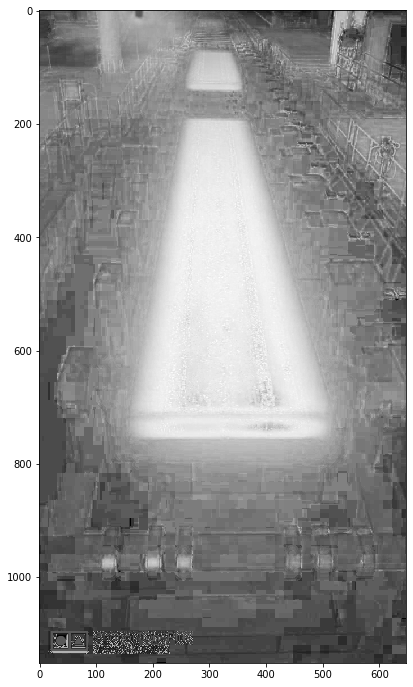

In [29]:
plt.figure(figsize=(10,12))
plt.imshow(gray,"gray")

In [30]:
_,thresh = cv2.threshold(gray,180,255,cv2.THRESH_BINARY)

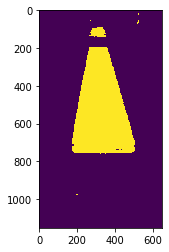

In [31]:
plt.imshow(thresh)

In [32]:
_ , contours, hierarchy =   cv2.findContours(thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [33]:
cnts = sorted(contours, key = cv2.contourArea,reverse= True)

In [34]:
blank = np.zeros((thresh.shape),dtype = np.uint8)

blank = cv2.drawContours(blank,cnts,0,(255,255,0),3)

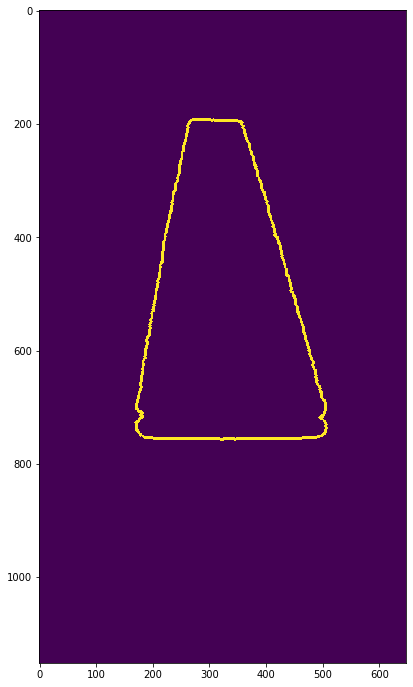

In [35]:
plt.figure(figsize=(10,12))
plt.imshow(blank)

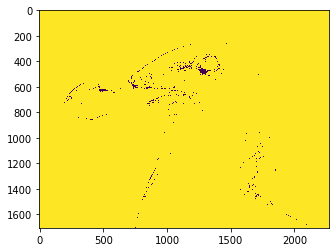

In [36]:
im = cv2.imread("C:/Users/shrin/Downloads/Gull_portrait_ca_usa.jpg")
h,w,chn = im.shape
seed = (int(w/2),int(h/2))

mask = np.zeros((h+2,w+2),np.uint8)

floodflags = 4
floodflags |= cv2.FLOODFILL_MASK_ONLY
floodflags |= (255 << 8)

num,im,mask,rect = cv2.floodFill(im, mask, seed, (255,0,0), (10,)*3, (10,)*3)

plt.imshow(mask)

In [37]:
type(mask[0][0])

numpy.uint8

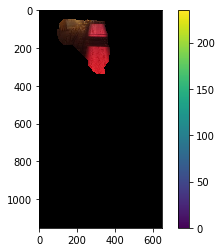

(<matplotlib.image.AxesImage at 0x1838c023748>,
 None)

In [38]:

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,15,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]



plt.imshow(img),plt.colorbar(),plt.show()

In [39]:
#%matplotlib notebook

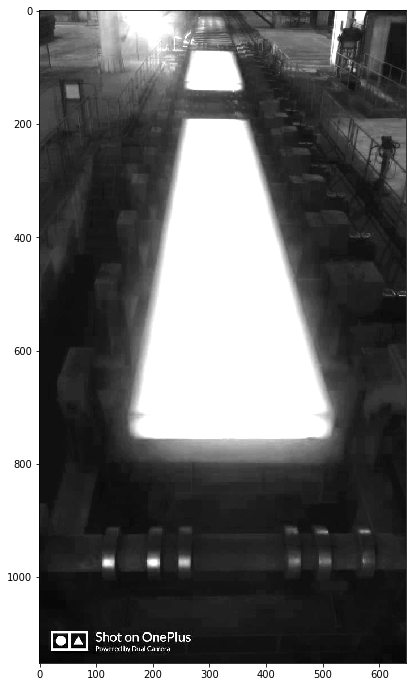

In [40]:
dst = cv2.addWeighted(u, 1, r, 0.95, 0.0)
plt.figure(figsize=(10,12))
plt.imshow(dst,"gray")